In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [124]:
data = pd.read_csv("Multiple linear regression.csv")

In [125]:
data

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [126]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


#### Create your first multiple regression

In [127]:
x = data[['GPA','Rand 1,2,3']]
y = data['SAT']

In [128]:
#x = sm.add_constant(x1)
#results = sm.OLS(y,x).fit()

In [129]:
#results.summary()

In [130]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [131]:
reg.coef_

array([245.1771933 ,  -0.27790455])

In [132]:
reg.intercept_

1029.347731366477

#### Calculating the R-Squared

In [133]:
reg.score(x,y)

0.40600907304948164

### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [134]:
x.shape

(84, 2)

In [135]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.3913426304087281

### Multiple Linear regression pvalues and Feature Scaling

In [136]:
from sklearn.feature_selection import f_regression

In [137]:
f_regression(x,y)

(array([56.04804786,  0.08259972]), array([7.19951844e-11, 7.74529835e-01]))

In [138]:
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 7.74529835e-01])

In [139]:
p_values.round(3)

array([0.   , 0.775])

### Creating summary table

In [140]:
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary

,Features
0,GPA
1,"Rand 1,2,3"


In [141]:
reg_summary['coefficients'] = reg.coef_
reg_summary['p_values'] = p_values.round(3)

In [142]:
reg_summary

,Features,coefficients,p_values
0,GPA,245.177193,0.000
1,"Rand 1,2,3",-0.277905,0.775


### Feature scaling with F-reg and Graph

In [143]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from matplotlib import pyplot

In [144]:
f_regression(x,y)

(array([56.04804786,  0.08259972]), array([7.19951844e-11, 7.74529835e-01]))

In [145]:
fs = SelectKBest(score_func=f_regression, k='all').fit(x,y)

In [146]:
x_new = fs.transform(x)
fs.score_func


<function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True, force_finite=True)>

Feature 0: 56.048048
Feature 1: 0.082600


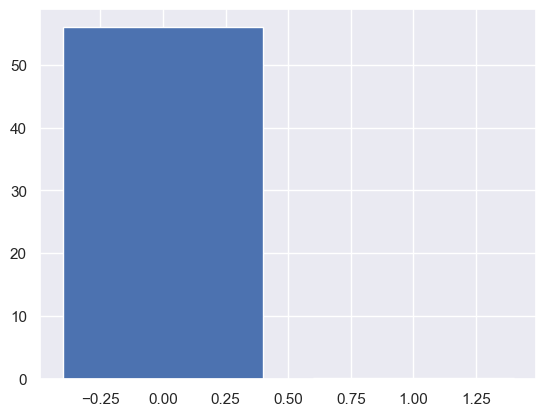

In [147]:
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()
